In [1]:
# importar biblioteca
from osgeo import gdal

# importar constantes
from gdalconst import *

# informar o uso de exceções
gdal.UseExceptions()

# mostrar versão instalada
print (gdal.__version__)

2.3.3


GDAL is a library for geographic data format translation distributed by the Open Source Geospatial Foundation (OSGeo) under the X / MIT license, an Open Source style.

GDAL stands for Geospatial Data Abstraction Library, and allows users to manipulate 142 raster file formats and 84 vector file formats.

Applications that use it access all formats supported by the library through a single abstract data model. The GDAL library also has a variety of command line utility programs for format translation as well as a host of other functions.

Traditionally the GDAL library referred to Raster data while OGR referred to Simple Features. But from version 2.0 the two parts are more integrated.

Home: http://www.gdal.org

Official Python Documentation: http://gdal.org/python/

### 2. Raster

"The word raster has its origins in the Latin rastrum (a rake, ancinho), which is derived from radere (to scrape, raspar/arranhar). It originates from the raster scan video monitors, which paint the image line by line by magnetically steering a focused electron beam.

By association, it can also refer to a rectangular grid of pixels. The word rastrum is now used to refer to a device for drawing musical staff lines."

Fonte: Wikipedia

### 3. Storage Structure

### 4. The grid contains metadata related to images, including:

geographical boundaries
spatial reference system
number of rows / columns
6 coefficients for related transformation:

### 5. Band


### 6. Opening raster files

The open function is used to open a dataset, which requires two parameters:

File Name: Path and Full Name
Form of Access: information if the opening will be read-only or also change in the file (GA_ReadOnly or GA_Update).

In [3]:
# create dataset by opening file for reading
# filename = "imagens/2130115_2012-10-14T150656_RE2_3A-NAC_14557172_172240.tif"
filename = "C:/Users/mac/Documents/Lake_Abaya_Chamo/LC08_169056_20181120/LC08_L1TP_169056_20181120_20181129_01_T1.tar/LC08_L1TP_169056_20181120_20181129_01_T1_B1_9.Stack.TIF"
dataset = gdal.Open(filename, GA_ReadOnly)

# fechar o dataset e liberar memória
dataset = None

In [5]:
# library of system-related functions
# sys: System-specific parameters and functions
import sys

filename_erro = "teste/" + filename
print ("Try to open" + filename_erro)

try:
    dataset = gdal.Open(filename_erro, GA_ReadOnly)
    print ("File successfuly opened!")
except:
    print("Erro opening file!")
    
print ("Try to open" + filename)
try:
    dataset = gdal.Open(filename, GA_ReadOnly)
    print ("File successfully opened!")
except:
    print("Erro opening file!")

Try to openteste/C:/Users/mac/Documents/Lake_Abaya_Chamo/LC08_169056_20181120/LC08_L1TP_169056_20181120_20181129_01_T1.tar/LC08_L1TP_169056_20181120_20181129_01_T1_B1_9.Stack.TIF
Erro opening file!
Try to openC:/Users/mac/Documents/Lake_Abaya_Chamo/LC08_169056_20181120/LC08_L1TP_169056_20181120_20181129_01_T1.tar/LC08_L1TP_169056_20181120_20181129_01_T1_B1_9.Stack.TIF
File successfully opened!


### 6.2 DATASET Handling
A raster dataset can contain one or more bands (or data layers) that may be representing variations of spectral channels of the same sensor or the same variable over time. Each band of a dataset always has the same dimensions in X and Y (columns and rows), and thus covers the same spatial extent.

In [6]:
geotransform = dataset.GetGeoTransform()
print (geotransform)

(207885.0, 30.0, 0.0, 915615.0, 0.0, -30.0)


As can be seen from the above listing, the GetGeoTransform method returns a tuple with the respective values ​​quoted above, referring to the georeferencing transformation of the dataset used as an example.

In [9]:
# [0] is the x coordinate of the upper left cell in raster
# [1] is the width of the elements in the raster
# [2] is the element rotation in x, is set to 0 if a north up raster
# [3] is the y coordinate of the upper left cell in raster
# [4] is the element rotation in y, is set to 0 if a north up raster
# [5] is the height of the elements in the raster (negative)

latitude = geotransform[3]
longitude = geotransform[0]
resolution_x = geotransform[1]
resolution_y = -geotransform[5]

print ("Dataset start latitude:", latitude)
print ("Dataset initial longitude:", longitude)
print ("Resolution (x) do dataset:", resolution_x)
print ("Resolution (y) do dataset:", resolution_y)

Dataset start latitude: 915615.0
Dataset initial longitude: 207885.0
Resolution (x) do dataset: 30.0
Resolution (y) do dataset: 30.0


To know which coordinate system in this dataset, you must use the GetProjectionRef method which returns a description in WKT (Well-Known Text) format, which is a text markup language used to represent a spatial reference system of spatial objects. the transformation between coordinate systems.

In [10]:
print (dataset.GetProjectionRef())

PROJCS["WGS_1984_UTM_Zone_37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32637"]]


A Spatial Reference System (SRS) or Coordinate Reference System (CRS) can be a local, regional or global based system used to locate geographic objects.

To enable greater interoperability and ease of use, various geographic information systems refer to a Spatial Reference System indicating only an integer representing the SRID or EPSG codes that are defined by the International Association of Oil and Gas Producers.

To identify the correct codes for the spatial reference system of interest you can use the following portals:

http://epsg.io

http://spatialreference.org

### 6.3 File Dimensions
To know the number of rows and columns of the dataset being used we must use the Raster Y Size and Raster X Size method as shown in the example:

In [13]:
# number of rows and columns
rows = dataset.RasterYSize
columns = dataset.RasterXSize

print ("Number of rows:", rows)
print ("Number of columns:", columns)

Number of rows: 7761
Number of columns: 7611


### 6.4 Reading data from file band
Depois da abertura do arquivo e da geração do dataset, a leitura de cada banda deve ser realizada individualmente e de forma repetida iniciando a partir da banda 1 até o total de bandas de cada arquivo, que pode ser obtido por meio do método RasterCount

In [21]:
# number of bands in the stacked images for Lnadsat8(Bnads 1-7, 9)
bands = dataset.RasterCount

print ("Number of Bands:", bands)

# in the case of Landsat 8 image, bands 5
# and 4 correspond to NIR and RED bands
band_nir = dataset.GetRasterBand (5)
band_red = dataset.GetRasterBand (4)

Number of Bands: 8


An important property for proper data manipulation is to check the type of stored data that has just been read from the band.

In [22]:
print ("Data Types:")
print ("band_nir:", gdal.GetDataTypeName(band_nir.DataType))
print ("band_red:", gdal.GetDataTypeName(band_red.DataType))

Data Types:
band_nir: UInt16
band_red: UInt16


You can know the minimum and maximum value of a band using the ComputeRasterMinMax band method.

In [26]:
(lowest_value, highest_value) = band_red.ComputeRasterMinMax ()
print ("Lowest RED:", lowest_value)
print ("Highest RED:", highest_value)

Lowest RED: 0.0
Highest RED: 49318.0


In [27]:
(lowest_value, highest_value) = band_nir.ComputeRasterMinMax ()
print ("Lowest NIR:", lowest_value)
print ("Highest NIR:", highest_value)

Lowest NIR: 0.0
Highest NIR: 55086.0


### Exercises
Write a program to display the minimum and maximum values ​​of all working raster bands.

In [28]:
for i in range(bands):
    print ("Mínimum and maximum band", i + 1)
    print (dataset.GetRasterBand(i + 1).ComputeRasterMinMax())

Mínimum and maximum band 1
(0.0, 43694.0)
Mínimum and maximum band 2
(0.0, 45875.0)
Mínimum and maximum band 3
(0.0, 46677.0)
Mínimum and maximum band 4
(0.0, 49318.0)
Mínimum and maximum band 5
(0.0, 55086.0)
Mínimum and maximum band 6
(0.0, 52204.0)
Mínimum and maximum band 7
(0.0, 65535.0)
Mínimum and maximum band 8
(0.0, 8267.0)


Once the band object is created we need to read the data to begin any processing with these values. A widely used way is to manipulate the matrix data with the aid of the NumPy library, using the ReadAsArray method to read the values ​​generating a multidimensional array. Another important information is to know if the matrix that was generated by reading the band was created with the number of rows and columns correctly, this should be done using the shape method.

In [29]:
# get it from the numpy arrays of the bands
array_red = band_red.ReadAsArray ()
array_nir = band_nir.ReadAsArray ()

# Generation of array derived from the bands
array_ndvi = (array_nir - array_red) / (array_nir + array_red)
# show output array dimensions
print (array_ndvi.shape)

(7761, 7611)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


We can combine the NumPy and Matplotlib libraries to view the arrays as images.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


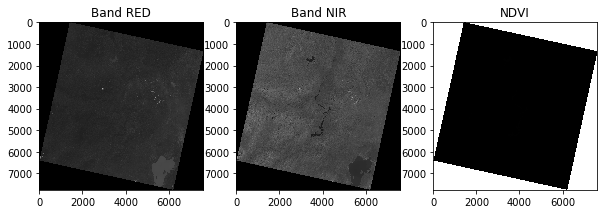

In [31]:
# display dos resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title("Band RED")
plt.imshow(array_red, cmap='gray')

plt.subplot(131)
plt.title("Band RED")
plt.imshow(array_red, cmap='gray')

plt.subplot(132)
plt.title("Band NIR")
plt.imshow(array_nir, cmap='gray')

plt.subplot(133)
plt.title("NDVI")
plt.imshow(array_ndvi, cmap='gray')
plt.show()